In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G=nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph)
# Extra quick check to see if graph loaded properly:
nx.is_directed(G)

False

In [4]:
# Graph statistics: Count the Number of nodes, Number of edges, avg degree etc. 
print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
average_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering}")

Number of nodes: 4039
Number of edges: 88234
Average Clustering Coefficient: 0.6055467186200876


In [5]:
diameter = nx.diameter(G)
print(f"Graph Diameter: {diameter}")
density = nx.density(G)
print(f"Graph Density: {density}")

Graph Diameter: 8
Graph Density: 0.010819963503439287


In [6]:
# Get the degree of each node
degree_dict = dict(G.degree())
# Sort nodes by degree in descending order and get the top 5
top_5_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print(top_5_nodes)

[('107', 1045), ('1684', 792), ('1912', 755), ('3437', 547), ('0', 347)]


In [8]:
#For ease of future calculation of measures

top5=['107', '1684', '1912', '3437', '0']

In [9]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

top5_degreecentrality={node: degree_centrality[node] for node in top5}
print(top5_degreecentrality)

{'107': 0.258791480931154, '1684': 0.1961367013372957, '1912': 0.18697374938088163, '3437': 0.13546310054482416, '0': 0.08593363051015354}


In [10]:
# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G)
top5_closenesscentrality={node: closeness_centrality[node] for node in top5}
print(top5_closenesscentrality)

{'107': 0.45969945355191255, '1684': 0.39360561458231796, '1912': 0.35094733182687293, '3437': 0.31441252043914975, '0': 0.35334266713335666}


In [11]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top5_betweennesscentrality={node: betweenness_centrality[node] for node in top5}
print(top5_betweennesscentrality)

{'107': 0.4805180785560152, '1684': 0.3377974497301992, '1912': 0.2292953395868782, '3437': 0.23611535735892905, '0': 0.14630592147442917}


In [12]:
# Compute pagerank centrality
pagerank = nx.pagerank(G)

top5_pagerank={node: pagerank[node] for node in top5}
print(top5_pagerank)

{'107': 0.006936420955866114, '1684': 0.0063671621383068295, '1912': 0.0038769716008844974, '3437': 0.007614586844749603, '0': 0.006289602618466542}


In [13]:
#Create a dictionary to hold shortest path distances
shortest_path_distances = {}

# Calculate pairwise shortest path distances
for i in range(len(top5)):
    for j in range(i + 1, len(top5)):
        node_a = top5[i]
        node_b = top5[j]
        
        if node_a in G and node_b in G:
            # Calculate shortest path distance
            distance = nx.shortest_path_length(G, source=node_a, target=node_b)
            shortest_path_distances[(node_a, node_b)] = distance
         
print(shortest_path_distances)

{('107', '1684'): 1, ('107', '1912'): 2, ('107', '3437'): 2, ('107', '0'): 1, ('1684', '1912'): 2, ('1684', '3437'): 3, ('1684', '0'): 2, ('1912', '3437'): 3, ('1912', '0'): 2, ('3437', '0'): 3}


In [14]:
#Create a dictionary to hold common neighbors for each node
common_neighbours = {}

#pairwise
for i in range(len(top5)):
    for j in range(i + 1, len(top5)):
        node_a = top5[i]
        node_b = top5[j]
        
        if node_a in G and node_b in G:
                    common_neighbours[(node_a, node_b)] = sorted(nx.common_neighbors(G, node_a, node_b))
                
print(common_neighbours)

{('107', '1684'): ['1171', '1405', '1419', '1450', '1505', '1534', '1642', '1656', '1666', '171', '1726', '1758', '58', '990'], ('107', '1912'): ['1465', '1577', '1718', '428', '563', '58'], ('107', '3437'): ['1085'], ('107', '0'): ['171', '58'], ('1684', '1912'): ['58'], ('1684', '3437'): [], ('1684', '0'): ['107', '171', '58'], ('1912', '3437'): [], ('1912', '0'): ['136', '58'], ('3437', '0'): []}


In [19]:
#pairwise
for i in range(len(top5)):
    for j in range(i + 1, len(top5)):
        node_a = top5[i]
        node_b = top5[j]
        
        if node_a in G and node_b in G:
                                    
            preds = nx.jaccard_coefficient(G, [(node_a, node_b)])
          
            for node_a, node_b, p in preds:    
                print(f"({node_a}, {node_b}) -> {p:.8f}")
    

(107, 1684) -> 0.00767965
(107, 1912) -> 0.00334448
(107, 3437) -> 0.00062854
(107, 0) -> 0.00143885
(1684, 1912) -> 0.00064683
(1684, 3437) -> 0.00000000
(1684, 0) -> 0.00264085
(1912, 3437) -> 0.00000000
(1912, 0) -> 0.00181818
(3437, 0) -> 0.00000000


In [20]:
#Create a dictionary to hold AD index  
adamicadar_index = {}

#pairwise
for i in range(len(top5)):
    for j in range(i + 1, len(top5)):
        node_a = top5[i]
        node_b = top5[j]
        
        if node_a in G and node_b in G:
                                    
            preds = nx.adamic_adar_index(G, [(node_a, node_b)])
          
            for node_a, node_b, p in preds:    
                print(f"({node_a}, {node_b}) -> {p:.8f}")
                

(107, 1684) -> 4.25263941
(107, 1912) -> 1.44143561
(107, 3437) -> 0.23868315
(107, 0) -> 0.72594506
(1684, 1912) -> 0.40242960
(1684, 3437) -> 0.00000000
(1684, 0) -> 0.86979327
(1912, 3437) -> 0.00000000
(1912, 0) -> 0.60691398
(3437, 0) -> 0.00000000


In [21]:
#pairwise
for i in range(len(top5)):
    for j in range(i + 1, len(top5)):
        node_a = top5[i]
        node_b = top5[j]
        
        if node_a in G and node_b in G:
                                    
            preds = nx.resource_allocation_index(G, [(node_a, node_b)])
          
            for node_a, node_b, p in preds:    
                print(f"({node_a}, {node_b}) -> {p:.8f}")
           
                
                

(107, 1684) -> 0.53489433
(107, 1912) -> 0.12461122
(107, 3437) -> 0.01515152
(107, 0) -> 0.12878788
(1684, 1912) -> 0.08333333
(1684, 3437) -> 0.00000000
(1684, 0) -> 0.12974482
(1912, 3437) -> 0.00000000
(1912, 0) -> 0.09085213
(3437, 0) -> 0.00000000


Text(0, 0.5, 'Frequency')

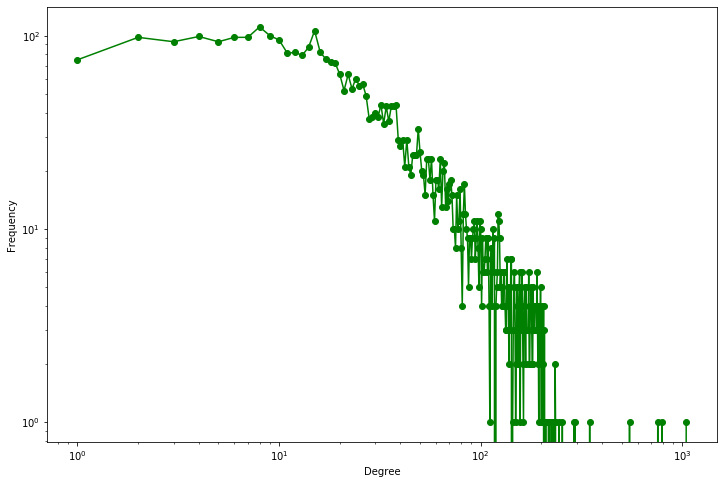

In [22]:
# plot the degree distribution
m=1
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [23]:
DG=nx.read_edgelist("soc-Epinions1.txt", create_using=nx.DiGraph)
# Extra quick check to see if graph loaded properly:
nx.is_directed(DG)

True

In [24]:
print(f"Number of nodes: {len(DG.nodes())}")
print(f"Number of edges: {len(DG.edges())}")
average_clustering_DG = nx.average_clustering(DG)
print(f"Average Clustering Coefficient: {average_clustering_DG}")

Number of nodes: 75879
Number of edges: 508837
Average Clustering Coefficient: 0.11017387558244757


In [25]:
diameter_DG = nx.diameter(DG)
print(f"Graph Diameter: {diameter_DG}")

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [26]:
density_DG = nx.density(DG)
print(f"Graph Density: {density_DG}")

Graph Density: 8.837739770666582e-05


In [27]:
# Get the degree of each node
indegree_dict = dict(DG.in_degree())
outdegree_dict = dict(DG.out_degree())
# Sort nodes by degree in descending order and get the top 5
Si = sorted(indegree_dict.items(), key=lambda x: x[1], reverse=True)[:5]
So = sorted(outdegree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print(Si)
print(So)

[('18', 3035), ('143', 1521), ('737', 1317), ('790', 1284), ('136', 1180)]
[('645', 1801), ('763', 1669), ('634', 1621), ('71399', 1128), ('3924', 976)]


In [28]:
Si={'18','143','737','790','136'}
So={'645','763','634','71399','3924'}
# Compute indegree centrality
indegree_centrality= nx.in_degree_centrality(DG)
# Compute outdegree centrality
outdegree_centrality= nx.out_degree_centrality(DG)

top5_indegreecentrality={node: indegree_centrality[node] for node in Si}
print(top5_indegreecentrality)


top5_outdegreecentrality={node: outdegree_centrality[node] for node in So}
print(top5_outdegreecentrality)

{'18': 0.03999841851393026, '790': 0.016921900946255834, '737': 0.017356809615435304, '143': 0.020045335933999316, '136': 0.015551279685811435}
{'763': 0.021995835420016343, '71399': 0.014865969055589236, '3924': 0.012862753367247425, '634': 0.021363240992118927, '645': 0.023735470096734233}


In [30]:
# Compute pagerank centrality
pagerank_DG = nx.pagerank(DG)

top5_pagerank_DG_Si={node: pagerank_DG[node] for node in Si}

print(top5_pagerank_DG_Si)

top5_pagerank_DG_So={node: pagerank_DG[node] for node in So}
print(top5_pagerank_DG_So)

{'18': 0.004657194750781488, '790': 0.002121522479957848, '737': 0.0028806802935228354, '143': 0.0020036756423157677, '136': 0.002035177200610162}
{'763': 0.00039686001132716687, '71399': 0.00011794620372325831, '3924': 8.654317487992723e-05, '634': 0.00046147625862827445, '645': 0.00037430857171436905}


In [36]:
#Create a dictionary to hold shortest path distances
shortest_path_distances_Si = {}
shortest_path_distances_So = {}

Si=['18','143','737','790','136']

# Calculate pairwise shortest path distances
for i in range(len(Si)):
    for j in range(i + 1, len(Si)):
        node_a = Si[i]
        node_b = Si[j]
        
        if node_a in DG and node_b in DG:
            # Calculate shortest path distance
            distance_Si = nx.shortest_path_length(DG, source=node_a, target=node_b)
            shortest_path_distances_Si[(node_a, node_b)] = distance_Si
         
print(shortest_path_distances_Si)







{('18', '143'): 2, ('18', '737'): 2, ('18', '790'): 1, ('18', '136'): 1, ('143', '737'): 1, ('143', '790'): 2, ('143', '136'): 2, ('737', '790'): 2, ('737', '136'): 2, ('790', '136'): 1}


In [37]:
So=['645','763','634','71399','3924']

# Calculate pairwise shortest path distances
for i in range(len(So)):
    for j in range(i + 1, len(Si)):
        node_a = So[i]
        node_b = So[j]
        
        if node_a in DG and node_b in DG:
            # Calculate shortest path distance
            distance_So = nx.shortest_path_length(DG, source=node_a, target=node_b)
            shortest_path_distances_So[(node_a, node_b)] = distance_So
         
print(shortest_path_distances_So)

{('645', '763'): 1, ('645', '634'): 1, ('645', '71399'): 2, ('645', '3924'): 2, ('763', '634'): 1, ('763', '71399'): 1, ('763', '3924'): 2, ('634', '71399'): 2, ('634', '3924'): 2, ('71399', '3924'): 2}


In [44]:
import itertools
Si = ['18', '143', '737', '790', '136']


# Function to count common in-neighbors between two nodes
def count_common_in_neighbors(graph, node_a, node_b):
    in_neighbors_a = set(graph.predecessors(node_a))
    in_neighbors_b = set(graph.predecessors(node_b))
    return len(in_neighbors_a.intersection(in_neighbors_b))  # Return the count of common in-neighbors

# Dictionary to hold the count of common in-neighbors for each pair of nodes
common_in_neighbors_count_Si = {}

# Convert node labels to integers when accessing the graph
Si = [(node) for node in Si]  # Convert string nodes to integers

# Iterate through all pairs of nodes in Si
for node_a, node_b in itertools.combinations(Si, 2):
    count_common_in = count_common_in_neighbors(DG, node_a, node_b)
    common_in_neighbors_count_Si[(node_a, node_b)] = count_common_in

# Print the count of common in-neighbors for each pair of nodes in Si
print("Count of Common In-Neighbors within Si:")
for pair, count in common_in_neighbors_count_Si.items():
    print(f"Nodes {pair}: Count of Common In-Neighbors: {count}")

Count of Common In-Neighbors within Si:
Nodes ('18', '143'): Count of Common In-Neighbors: 588
Nodes ('18', '737'): Count of Common In-Neighbors: 422
Nodes ('18', '790'): Count of Common In-Neighbors: 540
Nodes ('18', '136'): Count of Common In-Neighbors: 539
Nodes ('143', '737'): Count of Common In-Neighbors: 237
Nodes ('143', '790'): Count of Common In-Neighbors: 282
Nodes ('143', '136'): Count of Common In-Neighbors: 283
Nodes ('737', '790'): Count of Common In-Neighbors: 226
Nodes ('737', '136'): Count of Common In-Neighbors: 233
Nodes ('790', '136'): Count of Common In-Neighbors: 311


In [ ]:
So = ['645', '763', '634', '71399', '3924']

In [45]:
# Function to count common out-neighbors between two nodes
def count_common_out_neighbors(graph, node_a, node_b):
    out_neighbors_a = set(graph.successors(node_a))
    out_neighbors_b = set(graph.successors(node_b))
    return len(out_neighbors_a.intersection(out_neighbors_b))  # Return the count of common out-neighbors

# Dictionary to hold the count of common out-neighbors for each pair of nodes
common_out_neighbors_count_So = {}

# Convert node labels to integers when accessing the graph
So = [(node) for node in So]  # Convert string nodes to integers

# Iterate through all pairs of nodes in So
for node_a, node_b in itertools.combinations(So, 2):
    count_common_out = count_common_out_neighbors(DG, node_a, node_b)
    common_out_neighbors_count_So[(node_a, node_b)] = count_common_out

# Print the count of common out-neighbors for each pair of nodes in So
print("Count of Common Out-Neighbors within So:")
for pair, count in common_out_neighbors_count_So.items():
    print(f"Nodes {pair}: Count of Common Out-Neighbors: {count}")

Count of Common Out-Neighbors within So:
Nodes ('645', '763'): Count of Common Out-Neighbors: 345
Nodes ('645', '634'): Count of Common Out-Neighbors: 524
Nodes ('645', '71399'): Count of Common Out-Neighbors: 241
Nodes ('645', '3924'): Count of Common Out-Neighbors: 87
Nodes ('763', '634'): Count of Common Out-Neighbors: 295
Nodes ('763', '71399'): Count of Common Out-Neighbors: 138
Nodes ('763', '3924'): Count of Common Out-Neighbors: 41
Nodes ('634', '71399'): Count of Common Out-Neighbors: 202
Nodes ('634', '3924'): Count of Common Out-Neighbors: 77
Nodes ('71399', '3924'): Count of Common Out-Neighbors: 113


In [46]:
# Function to compute Jaccard similarity between two nodes based on in-neighbors
def jaccard_similarity_in(graph, node_a, node_b):
    in_neighbors_a = set(graph.predecessors(node_a))
    in_neighbors_b = set(graph.predecessors(node_b))
    # Compute intersection and union
    intersection = in_neighbors_a.intersection(in_neighbors_b)
    union = in_neighbors_a.union(in_neighbors_b)
    # Return Jaccard similarity
    if not union:  # Avoid division by zero if union is empty
        return 0
    return len(intersection) / len(union)

# Dictionary to hold Jaccard similarity values for each pair of nodes
jaccard_similarity_Si = {}

# Convert node labels to integers when accessing the graph
Si = [(node) for node in Si] 

# Iterate through all pairs of nodes in Si
for node_a, node_b in itertools.combinations(Si, 2):
    jaccard_sim = jaccard_similarity_in(DG, node_a, node_b)
    jaccard_similarity_Si[(node_a, node_b)] = jaccard_sim

# Print the Jaccard similarity values for each pair of nodes in Si
print("Jaccard Similarity (In-Neighbors) within Si:")
for pair, similarity in jaccard_similarity_Si.items():
    print(f"Nodes {pair}: Jaccard Similarity: {similarity:.4f}")

Jaccard Similarity (In-Neighbors) within Si:
Nodes ('18', '143'): Jaccard Similarity: 0.1482
Nodes ('18', '737'): Jaccard Similarity: 0.1074
Nodes ('18', '790'): Jaccard Similarity: 0.1429
Nodes ('18', '136'): Jaccard Similarity: 0.1466
Nodes ('143', '737'): Jaccard Similarity: 0.0911
Nodes ('143', '790'): Jaccard Similarity: 0.1118
Nodes ('143', '136'): Jaccard Similarity: 0.1170
Nodes ('737', '790'): Jaccard Similarity: 0.0952
Nodes ('737', '136'): Jaccard Similarity: 0.1029
Nodes ('790', '136'): Jaccard Similarity: 0.1444


In [47]:
# Function to compute Jaccard similarity between two nodes based on out-neighbors
def jaccard_similarity_out(graph, node_a, node_b):
    out_neighbors_a = set(graph.successors(node_a))  # Out-neighbors
    out_neighbors_b = set(graph.successors(node_b))
    # Compute intersection and union
    intersection = out_neighbors_a.intersection(out_neighbors_b)
    union = out_neighbors_a.union(out_neighbors_b)
    # Return Jaccard similarity
    if not union:  # Avoid division by zero if union is empty
        return 0
    return len(intersection) / len(union)

# Dictionary to hold Jaccard similarity values for each pair of nodes
jaccard_similarity_So = {}

# Convert node labels to integers when accessing the graph
So = [(node) for node in So]  # Convert string nodes to integers

# Iterate through all pairs of nodes in So
for node_a, node_b in itertools.combinations(So, 2):
    jaccard_sim = jaccard_similarity_out(DG, node_a, node_b)
    jaccard_similarity_So[(node_a, node_b)] = jaccard_sim

# Print the Jaccard similarity values for each pair of nodes in So
print("Jaccard Similarity (Out-Neighbors) within So:")
for pair, similarity in jaccard_similarity_So.items():
    print(f"Nodes {pair}: Jaccard Similarity: {similarity:.4f}")

Jaccard Similarity (Out-Neighbors) within So:
Nodes ('645', '763'): Jaccard Similarity: 0.1104
Nodes ('645', '634'): Jaccard Similarity: 0.1808
Nodes ('645', '71399'): Jaccard Similarity: 0.0897
Nodes ('645', '3924'): Jaccard Similarity: 0.0323
Nodes ('763', '634'): Jaccard Similarity: 0.0985
Nodes ('763', '71399'): Jaccard Similarity: 0.0519
Nodes ('763', '3924'): Jaccard Similarity: 0.0157
Nodes ('634', '71399'): Jaccard Similarity: 0.0793
Nodes ('634', '3924'): Jaccard Similarity: 0.0306
Nodes ('71399', '3924'): Jaccard Similarity: 0.0568


Text(0, 0.5, 'Frequency')

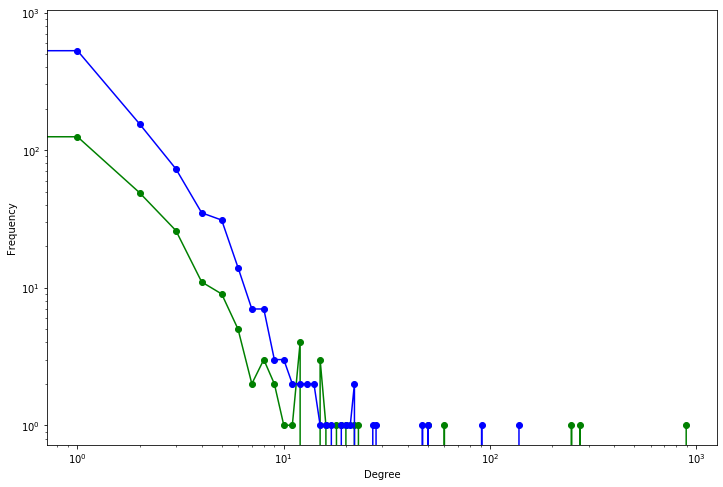

In [64]:
def degree_histogram_directed(DG, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    DG : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = DG.nodes()
    if in_degree:
        in_degree = dict(DG.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(DG.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in DG.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

## Plot the degree
DG = nx.scale_free_graph(1000)

in_degree_freq = degree_histogram_directed(DG, in_degree=True)
out_degree_freq = degree_histogram_directed(DG, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

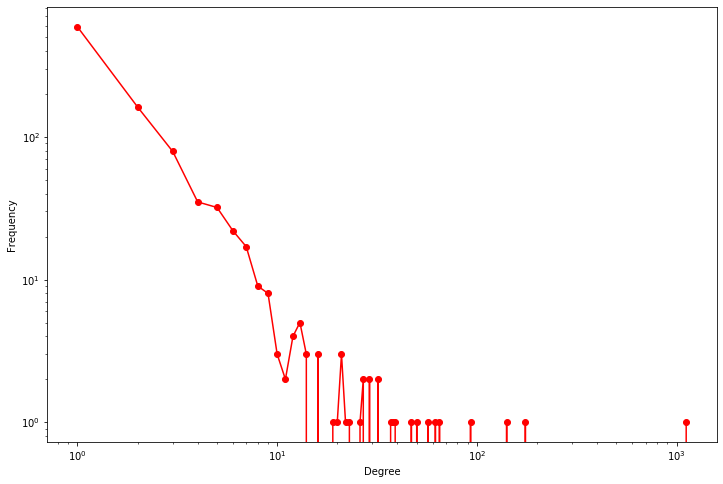

In [62]:
# plot the degree distribution
m=1
degree_freq = nx.degree_histogram(DG)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'ro-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')